# Vision
Experimental code to get the digit recognition stuff to work.

1. Read the input (and draw them out in a pretty image)
2. Train with this input
3. Test against examples

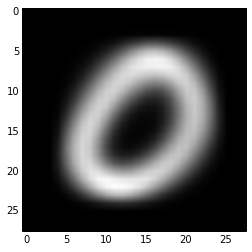

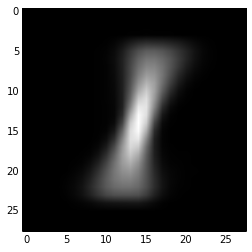

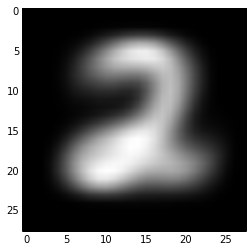

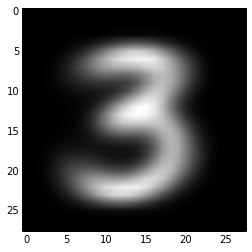

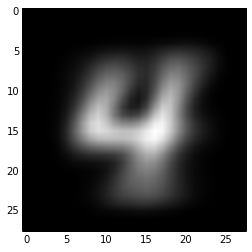

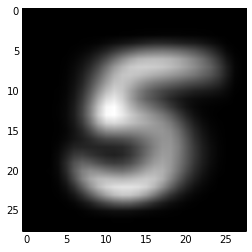

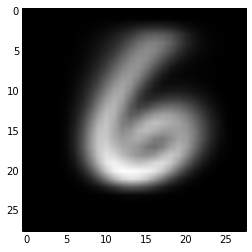

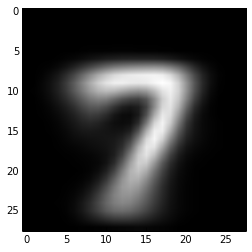

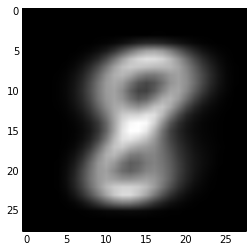

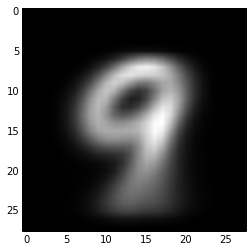

In [23]:
import os, struct
from array import array as pyarray
from numpy import append, arange, array, int8, uint8, zeros

from pylab import *
from numpy import *

%matplotlib inline
import matplotlib.pyplot as plt

def load_mnist(dataset="training", digits=arange(10), path="."):
    """
    Loads MNIST files into 3D numpy arrays

    Adapted from: http://abel.ee.ucla.edu/cvxopt/_downloads/mnist.py
    """

    if dataset == "training":
        fname_img = os.path.join(path, '../training/images')
        fname_lbl = os.path.join(path, '../training/labels')
    elif dataset == "testing":
        fname_img = os.path.join(path, '../testing/images')
        fname_lbl = os.path.join(path, '../testing/labels')
    else:
        raise ValueError("dataset must be 'testing' or 'training'")

    flbl = open(fname_lbl, 'rb')
    magic_nr, size = struct.unpack(">II", flbl.read(8))
    lbl = pyarray("b", flbl.read())
    flbl.close()

    fimg = open(fname_img, 'rb')
    magic_nr, size, rows, cols = struct.unpack(">IIII", fimg.read(16))
    img = pyarray("B", fimg.read())
    fimg.close()

    ind = [ k for k in range(size) if lbl[k] in digits ]
    N = len(ind)

    images = zeros((N, rows, cols), dtype=uint8)
    labels = zeros((N, 1), dtype=int8)
    for i in range(len(ind)):
        images[i] = array(img[ ind[i]*rows*cols : (ind[i]+1)*rows*cols ]).reshape((rows, cols))
        labels[i] = lbl[ind[i]]

    return images, labels

for digit in range(0,10):
    images, labels = load_mnist('training', digits=[digit])
    img = images.mean(axis=0)
    plt.figure()
    plt.subplot(1, 1, 1)
    plt.imshow(img, cmap = 'gray')